In [ ]:
import pandas as pd
df = pd.read_csv('test_data.csv')
df.fillna(0, inplace=True)
print(df.info())


In [ ]:
key_figure_column = "Key Figure"
key_figure_index = df.columns.get_loc(key_figure_column)
# Select columns before and after the "Key Figure" column
columns_before = df.iloc[:, :key_figure_index].columns
columns_after = df.iloc[:, key_figure_index + 1:].columns
df_before_key_figure = df[columns_before]
df_after_key_figure = df[columns_after]
print(columns_before)
print(columns_after)

In [ ]:
for col in columns_before:
    df[col] = df[col].astype('object')
for col in columns_after:
    if df[col].dtype != 'object':
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')
    else:
        df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')
print(df.info())



In [ ]:
try:
    # Create a multi-select box to choose categorical variables
    cat = st.multiselect(
        "Choose Planning Level",
        df_before_key_figure.select_dtypes(
            include=['category', 'object', 'int64', 'float64']).columns
    )
    cat =['Customer ID','Product ID','Location ID']
    central_variable = 'W36 2023'
    constant_value = 3
    variable_index = df.columns.get_loc(central_variable)
    num = df.columns[variable_index: variable_index + constant_value]
    print(df[num])

    
    dfg = df.groupby(cat)[num].sum().reset_index()
    df = dfg
    
except Exception as e:
    # st.error(e)
    pass

print(dfg.info())

In [ ]:
#The planning level , and the data will aggragate in this level
cat =['Customer ID','Product ID']
central_variable = 'W36 2023'
constant_value = 30
variable_index = df.columns.get_loc(central_variable)
num = df.columns[variable_index: variable_index + constant_value]

num

In [ ]:

dfnum=df[num]
dfcat=df[cat]

In [ ]:

print(dfnum)

In [ ]:
print(dfcat)

In [ ]:

dfg= pd.concat([dfcat, dfnum],axis=1)
print(dfg)


In [ ]:

allowed_columns = ['category', 'CV']
allowed_columns.extend(cat)

allowed_columns

In [ ]:
#'Product ID' 'Customer ID' 'Location ID'

pd.pivot_table(df,values =num,
               index=cat, 
               aggfunc='sum').reset_index()

In [ ]:
#2956100 rows × 6 columns
#2956100 rows × 5 columns
dfg = df.groupby(cat)[num].sum().reset_index()
print(dfg)

In [ ]:
data_result=pd.pivot_table(df,values =num,index=cat,aggfunc='sum')

In [ ]:
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                         "bar", "bar", "bar", "bar"],
                   "B": ["one", "one", "one", "two", "two",
                         "one", "one", "two", "two"],
                   "C": ["small", "large", "large", "small",
                         "small", "large", "small", "small",
                         "large"],
                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                   "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})
df
df.info()

In [ ]:
table = pd.pivot_table(df, values=['D','E'], index=[ 'A','B','C'],
                       aggfunc="sum").reset_index()
table

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate data for three clusters
cluster1 = np.random.normal(loc=10, scale=2, size=100)  # Mean=10, Std=2
cluster2 = np.random.normal(loc=20, scale=3, size=100)  # Mean=20, Std=3
cluster3 = np.random.normal(loc=30, scale=1, size=100)  # Mean=30, Std=1

# Combine data from all clusters
data = np.concatenate([cluster1, cluster2, cluster3])

# Shuffle the data
np.random.shuffle(data)

# Plot the data
plt.figure(figsize=(8, 6))
plt.hist(data, bins=30, color='skyblue', edgecolor='black')
plt.title('One-dimensional Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate data for three clusters
cluster1 = np.random.normal(loc=10, scale=2, size=4000)   # Mean=10, Std=2
cluster2 = np.random.normal(loc=20, scale=3, size=4000)   # Mean=20, Std=3
cluster3 = np.random.normal(loc=30, scale=1, size=4000)   # Mean=30, Std=1

# Combine data from all clusters
data = np.concatenate([cluster1, cluster2, cluster3])

# Shuffle the data
np.random.shuffle(data)

# Plot the data
plt.figure(figsize=(8, 6))
plt.hist(data, bins=50, color='skyblue', edgecolor='black')
plt.title('One-dimensional Data Distribution (Over 10,000 points)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



import numpy as np

# Save data to a CSV file using numpy.savetxt()
np.savetxt('generated_data.csv', data, delimiter=',', header='value', comments='')


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Set random seed for reproducibility
np.random.seed(42)

# Generate random data with 10 dimensions
X, _ = make_blobs(n_samples=10000, n_features=10, centers=3, random_state=42)

# Convert data into a DataFrame for easier manipulation
df = pd.DataFrame(X, columns=[f"Feature_{i+1}" for i in range(10)])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
df['KMeans_Labels'] = kmeans.labels_

# Apply KMeans++ clustering
kmeans_pp = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_pp.fit(X)
df['KMeans_PP_Labels'] = kmeans_pp.labels_

# Display the results
print(df.head())
df.to_csv('data.csv', index=False)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

# Set random seed for reproducibility
np.random.seed(42)

# Generate clusters with varying sizes and distances
X, _ = make_blobs(n_samples=[1000, 2000, 3000], centers=[[0, 0], [4, 4], [8, 8]], cluster_std=[1.0, 2.0, 3.0], random_state=42)

# Convert data into a DataFrame for easier manipulation
df = pd.DataFrame(X, columns=["Feature_1", "Feature_2"])

# Display the first few rows of the DataFrame
print(df.head())



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Set random seed for reproducibility
np.random.seed(42)

# Generate clusters with varying sizes and distances
X, _ = make_blobs(n_samples=[1000, 2000, 3000], centers=[[0, 0], [4, 4], [8, 8]], cluster_std=[1.0, 2.0, 3.0], random_state=42)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
kmeans_labels = kmeans.labels_

# Apply KMeans++ clustering
kmeans_pp = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_pp.fit(X)
kmeans_pp_labels = kmeans_pp.labels_

# Visualize the clustering results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_pp_labels, cmap='viridis')
plt.title('KMeans++ Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Compute Silhouette Score for KMeans clustering
silhouette_score_kmeans = silhouette_score(X, kmeans_labels)

# Compute Silhouette Score for KMeans++ clustering
silhouette_score_kmeans_pp = silhouette_score(X, kmeans_pp_labels)

print("Silhouette Score for KMeans clustering:", silhouette_score_kmeans)
print("Silhouette Score for KMeans++ clustering:", silhouette_score_kmeans_pp)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Set random seed for reproducibility
np.random.seed(42)

# Generate clusters with increased overlap
X, _ = make_blobs(n_samples=[1000, 2000, 3000], centers=[[0, 0], [1, 1], [2, 2]], cluster_std=[2.0, 2.0, 2.0], random_state=42)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
kmeans_labels = kmeans.labels_

# Apply KMeans++ clustering
kmeans_pp = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_pp.fit(X)
kmeans_pp_labels = kmeans_pp.labels_

# Compute Silhouette Score for KMeans clustering
silhouette_score_kmeans = silhouette_score(X, kmeans_labels)

# Compute Silhouette Score for KMeans++ clustering
silhouette_score_kmeans_pp = silhouette_score(X, kmeans_pp_labels)

print("Silhouette Score for KMeans clustering:", silhouette_score_kmeans)
print("Silhouette Score for KMeans++ clustering:", silhouette_score_kmeans_pp)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Set random seed for reproducibility
np.random.seed(42)

# Generate complex dataset with irregularly shaped clusters
X, _ = make_moons(n_samples=3000, noise=0.1, random_state=42)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
kmeans_labels = kmeans.labels_

# Apply KMeans++ clustering
kmeans_pp = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans_pp.fit(X)
kmeans_pp_labels = kmeans_pp.labels_

# Compute Silhouette Score for KMeans clustering
silhouette_score_kmeans = silhouette_score(X, kmeans_labels)

# Compute Silhouette Score for KMeans++ clustering
silhouette_score_kmeans_pp = silhouette_score(X, kmeans_pp_labels)

print("Silhouette Score for KMeans clustering:", silhouette_score_kmeans)
print("Silhouette Score for KMeans++ clustering:", silhouette_score_kmeans_pp)


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Set random seed for reproducibility
# np.random.seed(42)

# Generate clusters with varying sizes and distances
X, _ = make_blobs(n_samples=[1000, 2000, 3000], centers=[[0, 0], [4, 4], [8, 8]], cluster_std=[1.0, 2.0, 3.0], random_state=42)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
df['KMeans_Labels'] = kmeans.labels_

# Apply KMeans++ clustering
kmeans_pp = KMeans(n_clusters=3, init='k-means++')
kmeans_pp.fit(X)
df['KMeans_PP_Labels'] = kmeans_pp.labels_

# Evaluate clustering performance using Silhouette Score
silhouette_score_kmeans = silhouette_score(X, kmeans.labels_)
silhouette_score_kmeans_pp = silhouette_score(X, kmeans_pp.labels_)

# Plot the clusters
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=20, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title(f'KMeans Clustering (Silhouette Score: {silhouette_score_kmeans:.7f})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_pp.labels_, cmap='viridis', s=20, alpha=0.5)
plt.scatter(kmeans_pp.cluster_centers_[:, 0], kmeans_pp.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title(f'KMeans++ Clustering (Silhouette Score: {silhouette_score_kmeans_pp:.7f})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate random data with 2 features
X, _ = make_blobs(n_samples=1000, n_features=2, centers=3, random_state=42)

# Convert data into a DataFrame for easier manipulation
df = pd.DataFrame(X, columns=["Feature_1", "Feature_2"])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
df['KMeans_Labels'] = kmeans.labels_

# Apply KMeans++ clustering
kmeans_pp = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_pp.fit(X)
df['KMeans_PP_Labels'] = kmeans_pp.labels_

# Evaluate clustering performance using Silhouette Score
silhouette_score_kmeans = silhouette_score(X, kmeans.labels_)
silhouette_score_kmeans_pp = silhouette_score(X, kmeans_pp.labels_)

# Plot the clusters
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=20, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title(f'KMeans Clustering (Silhouette Score: {silhouette_score_kmeans:.7f})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_pp.labels_, cmap='viridis', s=20, alpha=0.5)
plt.scatter(kmeans_pp.cluster_centers_[:, 0], kmeans_pp.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title(f'KMeans++ Clustering (Silhouette Score: {silhouette_score_kmeans_pp:.7f})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Set random seed for reproducibility
# np.random.seed(42)

# Generate a one-dimensional dataset (Gaussian)
X = np.random.rand(50, 1)

#This distribution is also known as a Gaussian distribution
#or a bell curve, and has a mean of 0 and a standard deviation of 1.


initial_centroids= np.array([[0.1],[0.1],[0.1]])
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3,init='random',max_iter=1)
kmeans.fit(X)
labels_kmeans = kmeans.labels_
# n_init=1,
# Apply KMeans++ clustering
kmeans_pp = KMeans(n_clusters=3, init='k-means++',max_iter=1)
kmeans_pp.fit(X)
labels_kmeans_pp = kmeans_pp.labels_

# Evaluate clustering performance using Silhouette Score
silhouette_score_kmeans = silhouette_score(X, labels_kmeans)
silhouette_score_kmeans_pp = silhouette_score(X, labels_kmeans_pp)

# Plot the clusters
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X, np.zeros_like(X), c=labels_kmeans, cmap='viridis', s=20, alpha=0.5)
plt.scatter(kmeans.cluster_centers_, np.zeros_like(kmeans.cluster_centers_), c='red', marker='x', s=100, label='Centroids')
plt.title(f'KMeans Clustering (Silhouette Score: {silhouette_score_kmeans:.7f})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X, np.zeros_like(X), c=labels_kmeans_pp, cmap='viridis', s=20, alpha=0.5)
plt.scatter(kmeans_pp.cluster_centers_, np.zeros_like(kmeans_pp.cluster_centers_), c='red', marker='x', s=100, label='Centroids')
plt.title(f'KMeans++ Clustering (Silhouette Score: {silhouette_score_kmeans_pp:.7f})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()


print(sorted(kmeans.cluster_centers_))
print(sorted(kmeans_pp.cluster_centers_))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate data for three clusters
cluster1 = np.random.normal(loc=10, scale=0.1, size=100)   # Mean=10, Std=2
cluster2 = np.random.normal(loc=10, scale=0.1, size=100)   # Mean=20, Std=3
cluster3 = np.random.normal(loc=10, scale=0.1, size=100)   # Mean=30, Std=1

# Combine data from all clusters
data = np.concatenate([cluster1,cluster2,cluster3])
# cluster2, cluster3
# Shuffle the data
np.random.shuffle(data)

# Plot the data
plt.figure(figsize=(8, 6))
plt.hist(data, bins=50, color='skyblue', edgecolor='black')
plt.title('One-dimensional Data Distribution (Over 10,000 points)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



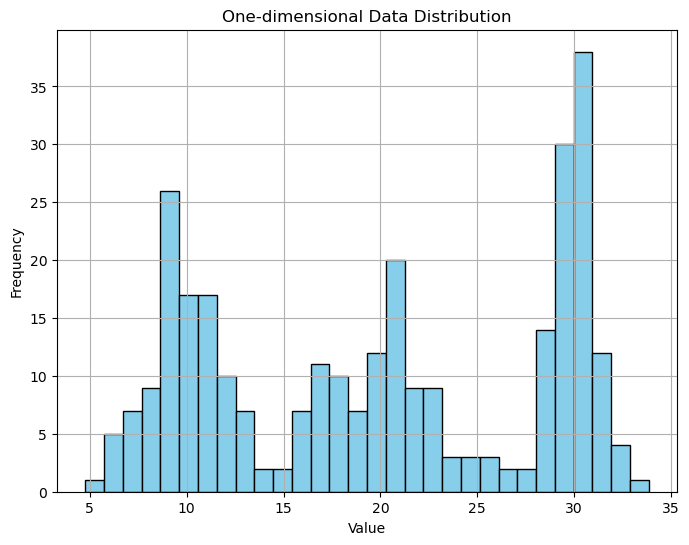

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate data for three clusters
cluster1 = np.random.normal(loc=10, scale=2, size=100)  # Mean=10, Std=2
cluster2 = np.random.normal(loc=20, scale=3, size=100)  # Mean=20, Std=3
cluster3 = np.random.normal(loc=30, scale=1, size=100)  # Mean=30, Std=1

# Combine data from all clusters
data = np.concatenate([cluster1, cluster2, cluster3])

# Shuffle the data
np.random.shuffle(data)

# Plot the data
plt.figure(figsize=(8, 6))
plt.hist(data, bins=30, color='skyblue', edgecolor='black')
plt.title('One-dimensional Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [28]:
data_reshaped = np.array(data).reshape(-1, 1)

c:\Users\HuijinYu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


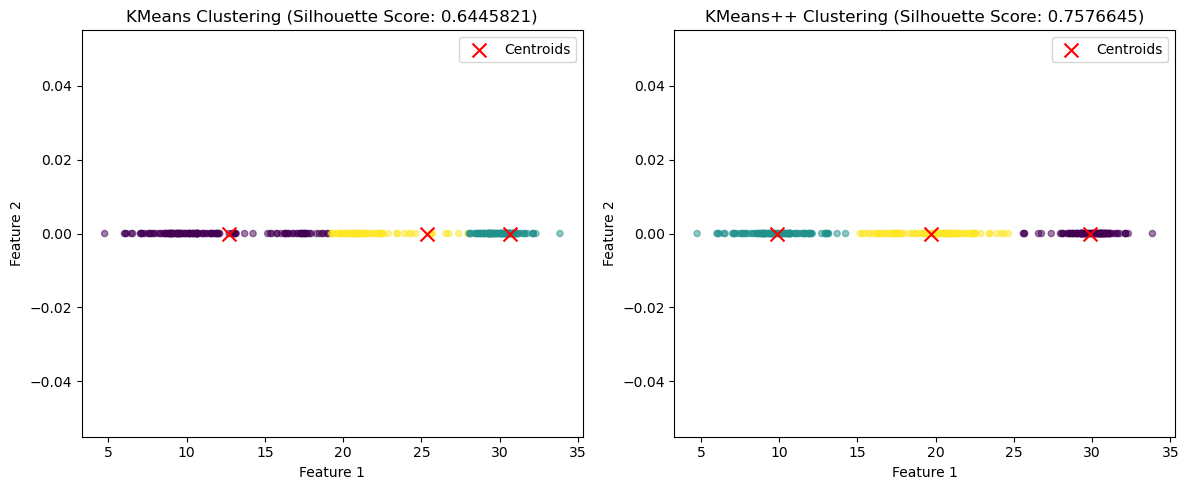

[array([12.72324332]), array([25.38793268]), array([30.68572555])]
[array([9.83638003]), array([19.7137616]), array([29.86374987])]


In [29]:
X=data_reshaped

initial_centroids= np.array([[10],[10],[10]])

#KMeans 
kmeans = KMeans(n_clusters=3,init=initial_centroids,n_init=1,max_iter=5)
kmeans.fit(X)
labels_kmeans = kmeans.labels_

# n_init=1,
# KMeans++ 
kmeans_pp = KMeans(n_clusters=3, init='k-means++',max_iter=100)
kmeans_pp.fit(X)
labels_kmeans_pp = kmeans_pp.labels_

#Silhouette Score
silhouette_score_kmeans = silhouette_score(X, labels_kmeans)
silhouette_score_kmeans_pp = silhouette_score(X, labels_kmeans_pp)

# Plot the clusters
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X, np.zeros_like(X), c=labels_kmeans, cmap='viridis', s=20, alpha=0.5)
plt.scatter(kmeans.cluster_centers_, np.zeros_like(kmeans.cluster_centers_), c='red', marker='x', s=100, label='Centroids')
plt.title(f'KMeans Clustering (Silhouette Score: {silhouette_score_kmeans:.7f})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X, np.zeros_like(X), c=labels_kmeans_pp, cmap='viridis', s=20, alpha=0.5)
plt.scatter(kmeans_pp.cluster_centers_, np.zeros_like(kmeans_pp.cluster_centers_), c='red', marker='x', s=100, label='Centroids')
plt.title(f'KMeans++ Clustering (Silhouette Score: {silhouette_score_kmeans_pp:.7f})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()


print(sorted(kmeans.cluster_centers_))
print(sorted(kmeans_pp.cluster_centers_))

In [ ]:

import streamlit as st
from streamlit_image_select import image_select

st.markdown("""
    ## Westernacher AI Navigator

            """)
img = image_select("Label", ["img1.png", "img2.png", "img3.png"])
st.write(img)
image1 = 'img1.png'
image2 = 'img2.png'
image3 = 'img2.png'
st.image([image1, image2, image3], width=200)

import streamlit as st
from PIL import Image

# Load local images
image1 = Image.open("img1.png")
image2 = Image.open("img2.png")
image3 = Image.open("img3.png")

# Display images side by side
col1, col2, col3 = st.columns(3)

# Display images in each column
with col1:
    st.image(image1, use_column_width=True, caption="Image 1")

with col2:
    st.image(image2, use_column_width=True, caption="Image 2")

with col3:
    st.image(image3, use_column_width=True, caption="Image 3")

